<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 161.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 196.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 145.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 167.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 160.3 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [16]:
## Write your code here

# Impute JobSat with mode
jobsat_mode = df['JobSat'].median()
df['JobSat'] = df['JobSat'].fillna(jobsat_mode)

# Impute RemoteWork with mode
remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

missing_data = df[['Employment','JobSat','RemoteWork']].isnull()
missing_per_column = missing_data.sum()
print(missing_per_column)


Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


  ExperienceLevel  JobSat
0             0-5     8.0
1            5-10     8.0
2           10-20     8.0
3             20+     8.0


/tmp/ipykernel_300/1499277541.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby(['ExperienceLevel'], as_index=False).agg({'JobSat': 'median'})
/tmp/ipykernel_300/1499277541.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_satisfaction, x='ExperienceLevel', y='JobSat', palette='pastel')


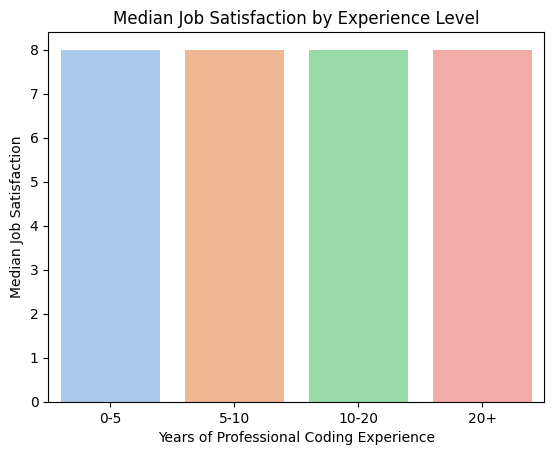

In [18]:
## Write your code here
mapping_dict = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51
}
df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_dict)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

median_satisfaction = df.groupby(['ExperienceLevel'], as_index=False).agg({'JobSat': 'median'})
print(median_satisfaction)


sns.barplot(data=median_satisfaction, x='ExperienceLevel', y='JobSat', palette='pastel')
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/3116158089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='pastel')


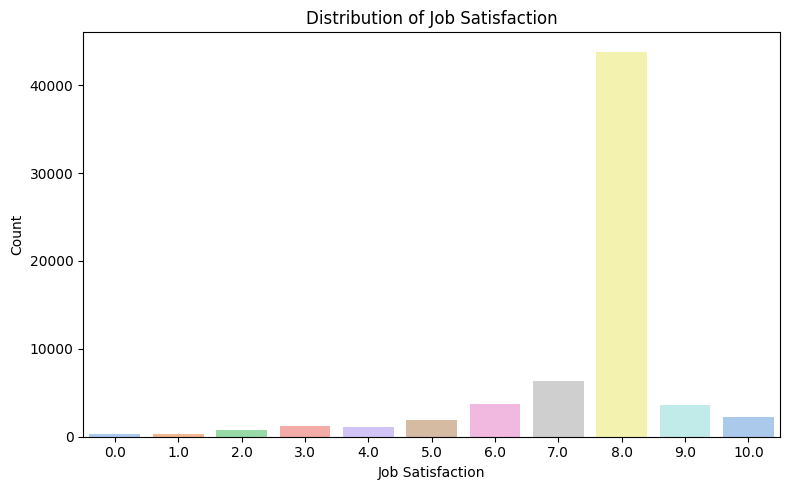

In [55]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='pastel')

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/190619792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='pastel')


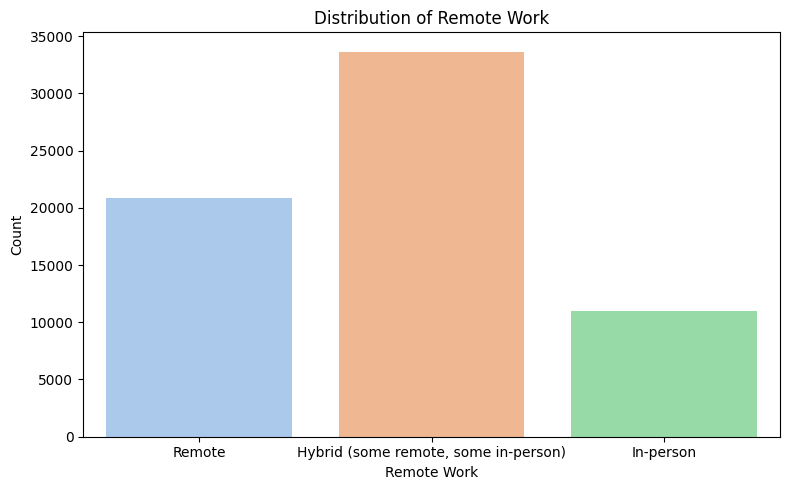

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             324   
                                       Blockchain                                                       17   
                                       Cloud infrastructure engineer                                   220   
                                       Data engineer                                                   430   
                                       Data or business analyst                                        178   
...                                                                                                    ...   
Student, part-time;Employed, part-time System administrator                                              4   
Student, part-time;Retired             Developer, full-stack                                             1   
                                       Security professional                                             1   
                                       Student                                                           1   
All                                                                                                  30296   

RemoteWork                                                            In-person  \
Employment                             DevType                                    
Employed, full-time                    Academic researcher                  209   
                                       Blockchain                            14   
                                       Cloud infrastructure engineer         42   
                                       Data engineer                        110   
                                       Data or business analyst              96   
...                                                                         ...   
Student, part-time;Employed, part-time System administrator                   4   
Student, part-time;Retired             Developer, full-stack                  0   
                                       Security professional                  0   
                                       Student                                0   
All                                                                        9706   

RemoteWork                                                            Remote  \
Employment                             DevType                                 
Employed, full-time                    Academic researcher                43   
                                       Blockchain                         66   
                                       Cloud infrastructure engineer     216   
                                       Data engineer                     297   
                                       Data or business analyst           77   
...                                                                      ...   
Student, part-time;Employed, part-time System administrator                0   
Student, part-time;Retired             Developer, full-stack               0   
                                       Security professional               0   
                                       Student                             0   
All                                                                    19443   

RemoteWork                                                              All  
Employment                             DevType                               
Employed, full-time                    Academic researcher              576  
                                       Blockchain                        97  
                                       Cloud infrastructure engineer    478  
                                       Data engineer      

In [15]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='pastel')

plt.title('Distribution of Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

df_pivot = df.pivot_table(
    index=['Employment','DevType'],
    columns='RemoteWork',
    aggfunc='size',       # Counts number of occurrences per combo
    fill_value=0          # Fill missing combos with 0
)


df_crosstab = pd.crosstab(
    index=[df['Employment'], df['DevType']],  # Rows: Employment and Job Role
    columns=df['RemoteWork'],                 # Columns: Remote work 
    margins=True,                             # adds row/column totals
)
df_crosstab

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


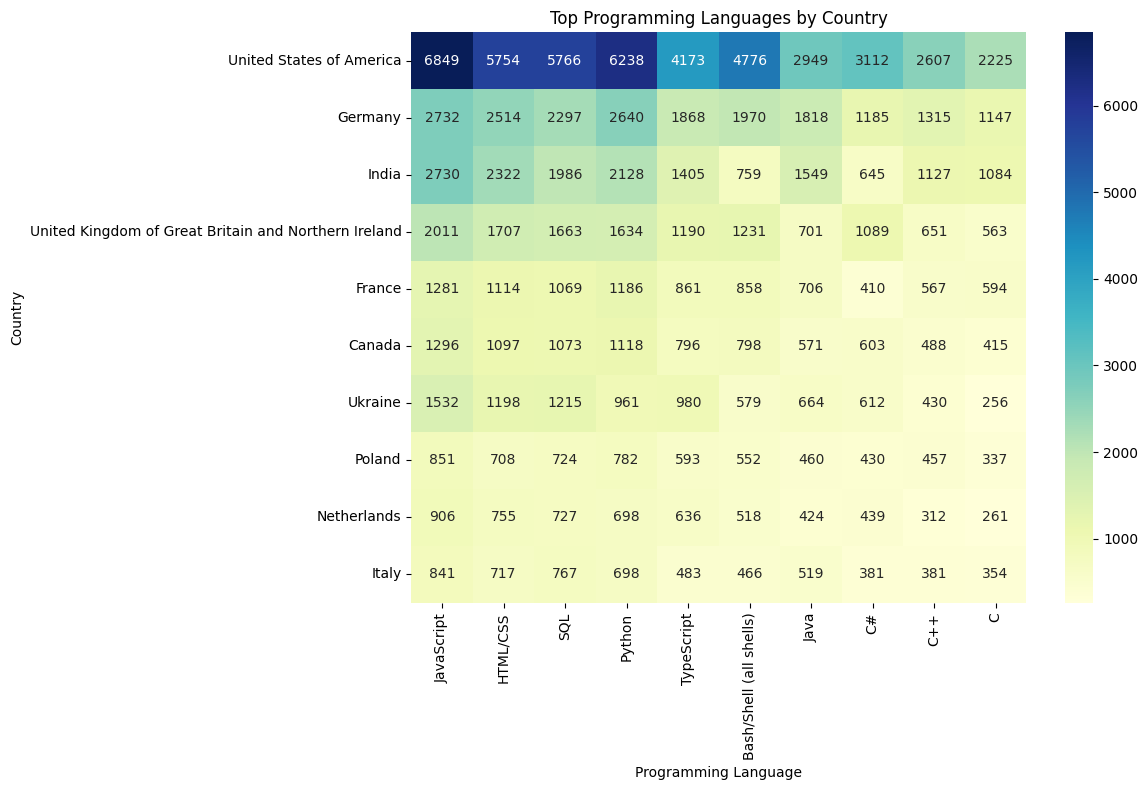

In [24]:
## Write your code here

# Split language strings into lists
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode into multiple rows — one per language
df_exploded = df.explode('LanguageList')

# Strip whitespace from language names
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

# Count occurrences by Country and Language
lang_counts = df_exploded.groupby(['Country', 'LanguageList']).size().reset_index(name='Count')

# Step 5: Pivot for heatmap (Language vs Country)
lang_pivot = lang_counts.pivot(index='Country', columns='LanguageList', values='Count').fillna(0)

# Step 6: Filter top 10 languages overall
top_countries = lang_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_languages = lang_pivot.sum().sort_values(ascending=False).head(10).index

# Filter
heatmap_data = lang_pivot.loc[top_countries, top_languages]

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Top Programming Languages by Country")
plt.ylabel("Country")
plt.xlabel("Programming Language")
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


                YearsCodePro  JobSatPoints_1
YearsCodePro        1.000000       -0.031962
JobSatPoints_1     -0.031962        1.000000


Text(0.5, 1.0, 'Correlation Between Experience and Satisfaction')

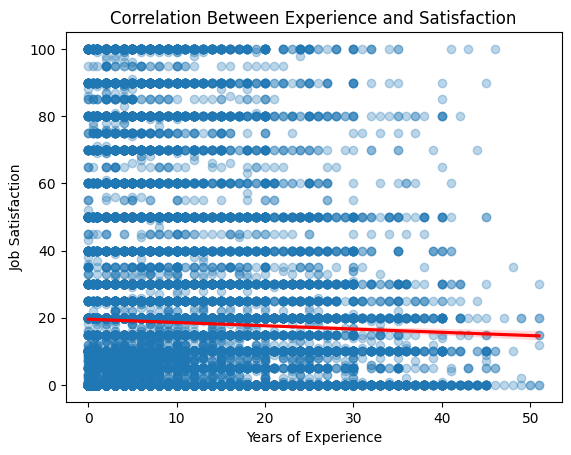

In [30]:
## Write your code here

print(df[["YearsCodePro", "JobSatPoints_1"]].corr())
sns.regplot(x="YearsCodePro", y="JobSatPoints_1", data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Years of Experience")
plt.ylabel("Job Satisfaction")
plt.title("Correlation Between Experience and Satisfaction")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


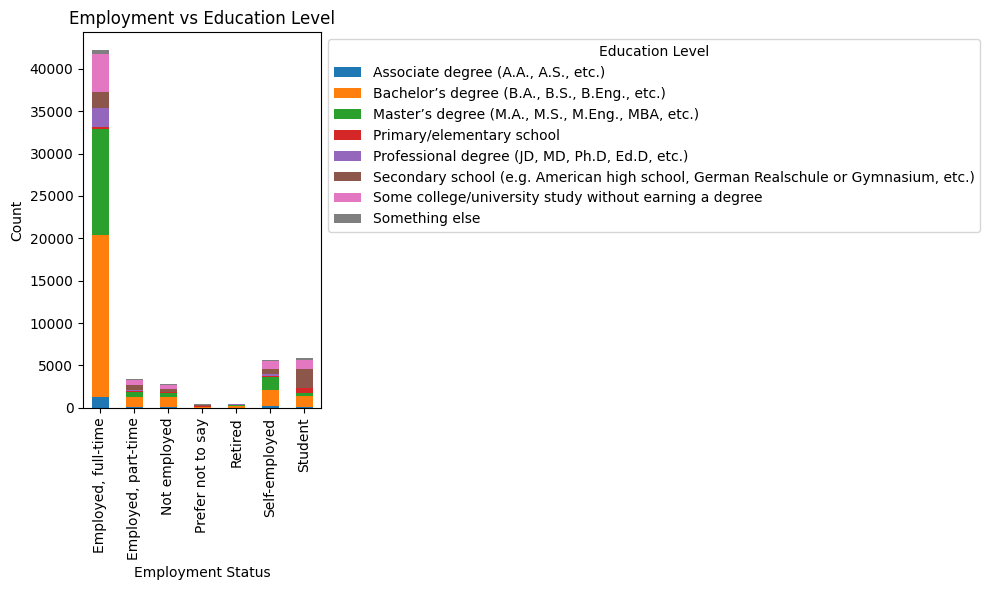

In [36]:
## Write your code here


#Simplify Employment 
def simplify_employment(emp_string):
    emp_string = str(emp_string).lower()
    
    if 'employed, full-time' in emp_string:
        return 'Employed, full-time'
    elif 'employed, part-time' in emp_string:
        return 'Employed, part-time'
    elif 'independent contractor' in emp_string or 'self-employed' in emp_string:
        return 'Self-employed'
    elif 'student' in emp_string:
        return 'Student'
    elif 'not employed' in emp_string:
        return 'Not employed'
    elif 'retired' in emp_string:
        return 'Retired'
    elif 'prefer not to say' in emp_string:
        return 'Prefer not to say'
    else:
        return 'Other'

df['EmploymentSimplified'] = df['Employment'].apply(simplify_employment)

# Create cross-tabulation between Employment and Education Level
df_crosstab = pd.crosstab(
    index=df['EmploymentSimplified'],
    columns=df['EdLevel'],          
)
df_crosstab

# Plot a stacked bar chart
df_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize plot
plt.title('Employment vs Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [37]:
## Write your code here
df.to_csv("cleaned_survey_dataset.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
